In [1]:
import numpy as np
import pandas as pd

# load the contents of a file into a pandas Dataframe
input_file = './datasets/titanic_dataset/original/train.csv'
df_titanic = pd.read_csv(input_file)

In [2]:
# how many rows and columns in the dataframe
df_titanic.shape

(891, 12)

In [3]:
# titles of the 12 columns
print (df_titanic.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# view the first 5 rows of the dataframe
pd.set_option('display.max_columns', None)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# load a 30 column dataset, to examine the behaviour of the head() function
input_file = './datasets/random_30column.csv'
df_random30 = pd.read_csv(input_file)
df_random30.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,target
0,457,430,295,778,420,420,560,821,362,116,601,706,808,452,207,554,822,992,660,85,360,652,762,488,27,211,836,651,8,1
1,679,597,940,859,590,304,22,444,514,32,551,994,805,719,642,821,614,975,764,355,827,687,901,197,524,774,630,138,253,1
2,278,326,998,885,974,387,238,288,22,251,968,942,954,278,324,681,485,825,525,36,846,964,295,586,226,439,865,557,706,0
3,909,604,10,876,845,100,119,72,718,955,452,175,947,801,451,202,895,217,151,35,743,599,658,218,911,138,522,457,263,1
4,622,26,272,67,520,837,804,236,679,689,927,857,7,940,615,926,389,350,111,851,948,881,943,872,705,595,880,77,675,1


In [6]:
pd.set_option('display.max_columns', 4)
df_random30.head()

,attribute_1,attribute_2,...,attribute_29,target
0,457,430,...,8,1
1,679,597,...,253,1
2,278,326,...,706,0
3,909,604,...,263,1
4,622,26,...,675,1


In [7]:
# Does this dataframe have a named index? If so, what is it?
print (df_titanic.index.name)

None


In [8]:
# set the index
df_titanic.set_index("PassengerId", inplace=True)

pd.set_option('display.max_columns', None)
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# how many rows and columns in the dataframe
# after the index has been set?
df_titanic.shape

(891, 11)

In [12]:
# extract the target attribute into its own dataframe
df_titanic_target = df_titanic.loc[:,['Survived']]

# create a dataframe that contains the 10 feature variables
df_titanic_features = df_titanic.drop(['Survived'], axis=1)

In [13]:
# what is the split between the two classes of the target variable?
df_titanic_target['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fffbbe0>]],
      dtype=object)

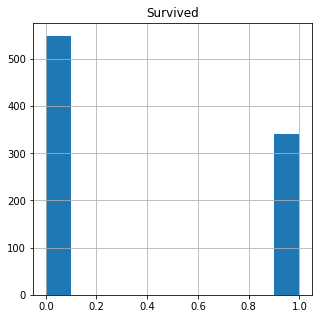

In [14]:
# historgram of target variable
%matplotlib inline
import matplotlib.pyplot as plt
df_titanic_target.hist(figsize=(5,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12008b828>,
      dtype=object)

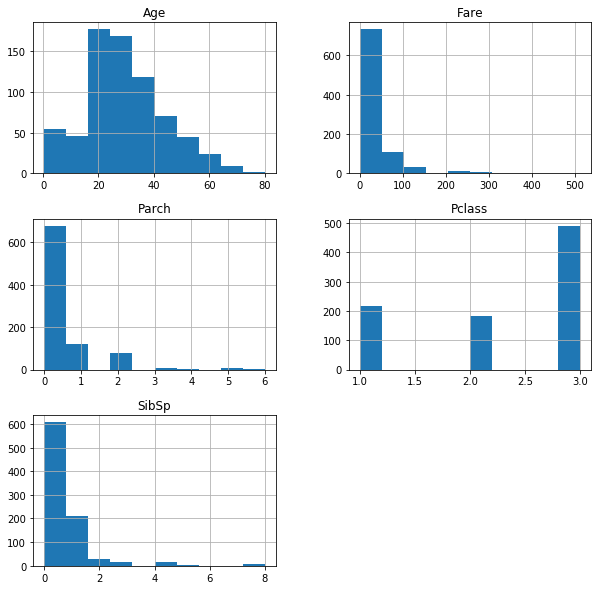

In [15]:
#histogram of features
df_titanic_features.hist(figsize=(10,10))